In [13]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [222]:
reviewss = pd.read_csv("zomato.csv")

In [223]:
reviewss.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


# EDA

In [224]:
reviewss.shape

(51717, 17)

In [225]:
reviewss.drop('url', axis=1, inplace=True)

In [226]:
reviewss['listed_in(city)'].unique()

array(['Banashankari', 'Bannerghatta Road', 'Basavanagudi', 'Bellandur',
       'Brigade Road', 'Brookefield', 'BTM', 'Church Street',
       'Electronic City', 'Frazer Town', 'HSR', 'Indiranagar',
       'Jayanagar', 'JP Nagar', 'Kalyan Nagar', 'Kammanahalli',
       'Koramangala 4th Block', 'Koramangala 5th Block',
       'Koramangala 6th Block', 'Koramangala 7th Block', 'Lavelle Road',
       'Malleshwaram', 'Marathahalli', 'MG Road', 'New BEL Road',
       'Old Airport Road', 'Rajajinagar', 'Residency Road',
       'Sarjapur Road', 'Whitefield'], dtype=object)

In [227]:
reviewss['listed_in(city)'].isna().sum()

0

In [228]:
reviewss['location'].unique()

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Nagarbhavi', 'Bannerghatta Road', 'BTM', 'Kanakapura Road',
       'Bommanahalli', nan, 'CV Raman Nagar', 'Electronic City', 'HSR',
       'Marathahalli', 'Sarjapur Road', 'Wilson Garden', 'Shanti Nagar',
       'Koramangala 5th Block', 'Koramangala 8th Block', 'Richmond Road',
       'Koramangala 7th Block', 'Jalahalli', 'Koramangala 4th Block',
       'Bellandur', 'Whitefield', 'East Bangalore', 'Old Airport Road',
       'Indiranagar', 'Koramangala 1st Block', 'Frazer Town', 'RT Nagar',
       'MG Road', 'Brigade Road', 'Lavelle Road', 'Church Street',
       'Ulsoor', 'Residency Road', 'Shivajinagar', 'Infantry Road',
       'St. Marks Road', 'Cunningham Road', 'Race Course Road',
       'Commercial Street', 'Vasanth Nagar', 'HBR Layout', 'Domlur',
       'Ejipura', 'Jeevan 

In [229]:
reviewss['cuisines'].unique()

array(['North Indian, Mughlai, Chinese', 'Chinese, North Indian, Thai',
       'Cafe, Mexican, Italian', ...,
       'North Indian, Street Food, Biryani', 'Chinese, Mughlai',
       'North Indian, Chinese, Arabian, Momos'], dtype=object)

In [ ]:
# only taking 4 main cuisines for the cuisines column

In [250]:
review = reviewss[(reviewss['cuisines']=='North Indian')| (reviewss['cuisines']=='South Indian')|(reviewss['cuisines']=='Chinese')|(reviewss['cuisines']=='Mughlai')|(reviewss['cuisines']=='Chinese')|(reviewss['cuisines']=='Thai')|(reviewss['cuisines']=='Rajasthani')]

In [251]:
review.head()

,name,online_order,book_table,rate,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
5,Timepass Dinner,Yes,No,3.8/5,Casual Dining,North Indian,600,Buffet,Banashankari
39,Maruthi Davangere Benne Dosa,Yes,No,4.0/5,Quick Bites,South Indian,150,Delivery,Banashankari
41,Havyaka Mess,No,No,3.9/5,Mess,South Indian,300,Delivery,Banashankari
50,Petoo,No,No,3.7/5,Quick Bites,North Indian,450,Delivery,Banashankari
62,Chinese Kitchen,Yes,No,3.8/5,Quick Bites,Chinese,150,Delivery,Banashankari


In [252]:
review['cuisines'].unique()

array(['North Indian', 'South Indian', 'Chinese', 'Mughlai', 'Rajasthani',
       'Thai'], dtype=object)

In [ ]:
# since we have city location no need of column of specific address

In [254]:
#review.drop('address', axis=1, inplace=True)

In [233]:
review.drop('location', axis=1, inplace=True)

In [160]:
# dropping phone number

In [234]:
review.drop('phone', axis=1, inplace=True)

In [162]:
# dropping menu items

In [235]:
review.drop('menu_item', axis=1, inplace=True)

In [164]:
# dropping dishes liked column

In [236]:
review.drop('dish_liked', axis=1, inplace=True)

In [ ]:
# dropping votes column

In [237]:
review.drop('votes',axis=1, inplace=True)

In [166]:
# rate column is being changed

In [238]:
review['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [239]:
review['rate'].fillna('3.5/5',inplace=True)

In [240]:
review['rate'].replace('NEW','3.5/5', inplace=True)

In [241]:
review['rate'].replace('-', '4.0/5', inplace=True)

In [255]:
review.head()

,name,online_order,book_table,rate,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
5,Timepass Dinner,Yes,No,3.8/5,Casual Dining,North Indian,600,Buffet,Banashankari
39,Maruthi Davangere Benne Dosa,Yes,No,4.0/5,Quick Bites,South Indian,150,Delivery,Banashankari
41,Havyaka Mess,No,No,3.9/5,Mess,South Indian,300,Delivery,Banashankari
50,Petoo,No,No,3.7/5,Quick Bites,North Indian,450,Delivery,Banashankari
62,Chinese Kitchen,Yes,No,3.8/5,Quick Bites,Chinese,150,Delivery,Banashankari


In [177]:
# updating the review_list column

In [179]:
# dropping reviews column because of data snooping

In [243]:
review.drop('reviews_list', axis=1, inplace=True)

# Data Visualisation

In [186]:
#divide dataset into X and Y

In [395]:
Y = review['rate']
X1 = review.drop('rate', axis=1)

In [396]:
X1['rest_type'].value_counts()

Quick Bites                    3278
Casual Dining                  1032
Delivery                        438
Takeaway, Delivery              235
Food Court                       84
Casual Dining, Bar               81
Mess                             64
Fine Dining                      41
Takeaway                         20
Fine Dining, Bar                 20
Casual Dining, Microbrewery      20
Dhaba                            18
Bar                              18
Kiosk                            14
Lounge                            8
Food Truck                        7
Bhojanalya                        3
Food Court, Quick Bites           1
Name: rest_type, dtype: int64

# 1. Plotting Restaurant Types

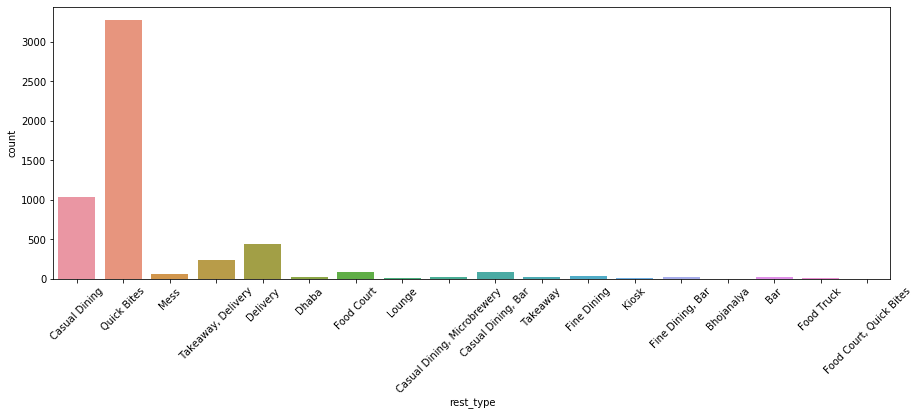

In [397]:
plt.figure(figsize= (15,5))
plt.xticks(rotation=45)
sns.countplot(x = X1['rest_type'], data = review)

# 2. Plotting Cuisine Options

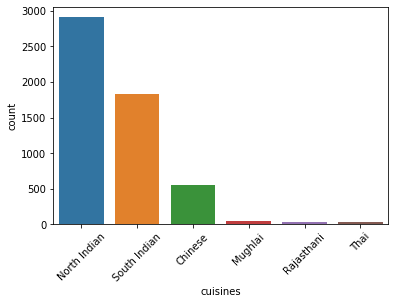

In [398]:
plt.xticks(rotation=45)
sns.countplot(x = X1['cuisines'], data=review)

# 3. Plotting Serving Type

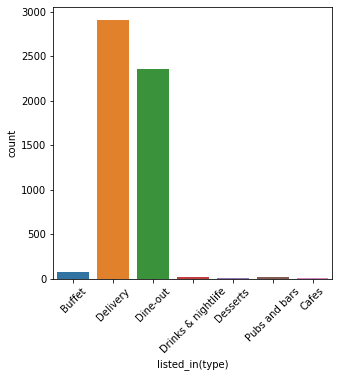

In [399]:
plt.figure(figsize = (5,5))
plt.xticks(rotation = 45)
sns.countplot(x = X1['listed_in(type)'], data=review)

# Plotting City Location

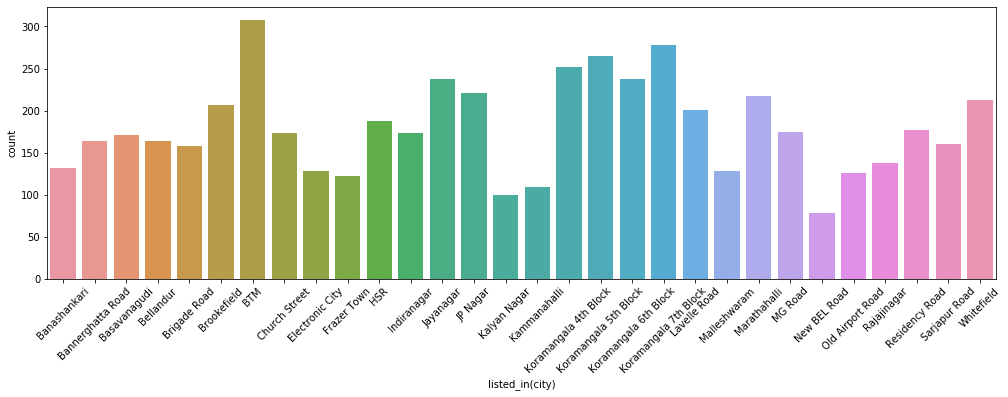

In [400]:
plt.figure(figsize = (17,5))
plt.xticks(rotation=45)
sns.countplot(x = X1['listed_in(city)'], data = review)

# Plotting the Different Ratings

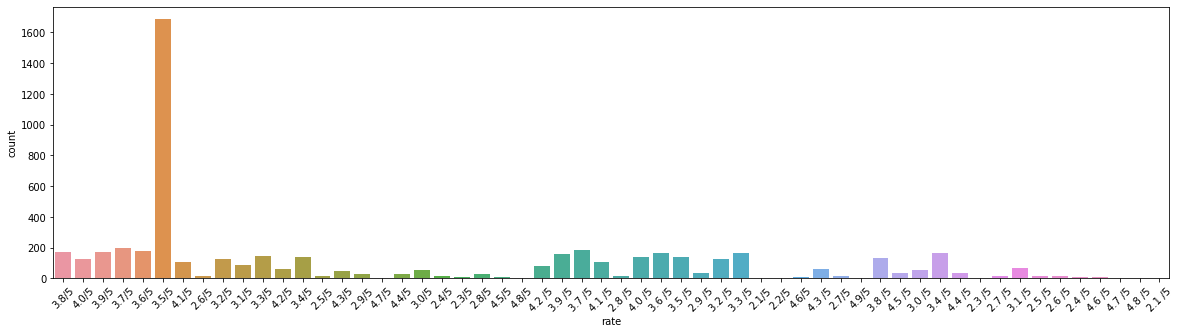

In [269]:
plt.figure(figsize= (20,5))
plt.xticks(rotation=45)
sns.countplot(x = Y, data = review)

In [270]:
# this is an unbalanced multi class dataset

In [271]:
import imblearn

In [273]:
from imblearn.combine import SMOTETomek

In [444]:
sm = SMOTETomek(random_state=42)

In [277]:
# FIRST we have to get our final dataset to start splitting into train and test sets

# Encoding Categorical Values

In [278]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [385]:
label = LabelEncoder()
ohe = OneHotEncoder(handle_unknown = 'ignore')

In [416]:
X1.head()

,name,online_order,book_table,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city),table_booking,serving_type,Cuisines,Name,City,Type of Listing
5,Timepass Dinner,1,No,Casual Dining,North Indian,600,Buffet,Banashankari,0,2,2,1159,1,0
39,Maruthi Davangere Benne Dosa,1,No,Quick Bites,South Indian,150,Delivery,Banashankari,0,15,4,598,1,2
41,Havyaka Mess,0,No,Mess,South Indian,300,Delivery,Banashankari,0,14,4,360,1,2
50,Petoo,0,No,Quick Bites,North Indian,450,Delivery,Banashankari,0,15,2,775,1,2
62,Chinese Kitchen,1,No,Quick Bites,Chinese,150,Delivery,Banashankari,0,15,0,172,1,2


In [402]:
X1.shape

(5398, 8)

In [415]:
X1['online_order'] = label.fit_transform(X1['online_order'])
X1['table_booking'] = label.fit_transform(X1['book_table'])

In [404]:
X1['table_booking'] = label.fit_transform(X1['book_table'])

In [405]:
X1['rest_type'].fillna('Quick Bites', inplace=True)

In [406]:
X1['serving_type'] = label.fit_transform(X1['rest_type'])

In [407]:
X1['Cuisines'] = label.fit_transform(X1['cuisines'])

In [413]:
X1['Type of Listing'] = label.fit_transform(X1['listed_in(type)'])

In [409]:
X1['Name'] = label.fit_transform(X1['name'])

In [437]:
X1['approx_cost(for two people)'].fillna(500, inplace=True)

In [417]:
#dropping categorical columns

In [418]:
X_final = X1.drop(columns=['online_order','online_order','rest_type','cuisines','listed_in(type)','name','listed_in(city)'],axis=1)

In [424]:
X_final

,approx_cost(for two people),table_booking,serving_type,Cuisines,Name,City,Type of Listing
5,600,0,2,2,1159,1,0
39,150,0,15,4,598,1,2
41,300,0,14,4,360,1,2
50,450,0,15,2,775,1,2
62,150,0,15,0,172,1,2
...,...,...,...,...,...,...,...
51626,300,0,15,2,314,29,4
51627,300,0,15,2,701,29,4
51631,250,0,15,2,477,29,4
51642,200,0,15,4,90,29,4


In [439]:
X_final.drop('approx_cost(for two people)', axis=1, inplace=True)

In [425]:
# splitting into train and tests sets

In [426]:
from sklearn.model_selection import train_test_split

In [440]:
x_train, x_test, y_train, y_test = train_test_split(X_final, Y)

In [460]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [462]:
rf = RandomForestClassifier()

In [452]:
rf.fit(x_train, y_train)

RandomForestClassifier()

In [453]:
rf.score(x_train, y_train)

0.9972826086956522

In [454]:
y_pred = rf.predict(x_test)

In [457]:
score = accuracy_score(y_test, y_pred)
score

0.36962962962962964

In [468]:
param = {'n_estimators':[100,200,300,400],
          'criterion':['gini','entropy'],
          'max_depth':[2,3,4,5]
          }

In [469]:
grid = GridSearchCV(estimator = rf, param_grid = param, verbose=1, n_jobs=-1)

In [470]:
grid.fit(x_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   22.5s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:  1.4min finished


GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5],
                         'n_estimators': [100, 200, 300, 400]},
             verbose=1)

In [471]:
grid.best_estimator_

RandomForestClassifier(max_depth=5)

In [472]:
y_pred2 = grid.predict(x_test)

In [473]:
score2 = accuracy_score(y_test, y_pred2)

In [474]:
score2

0.36962962962962964